# SVM Classifier

1. Train the classifier on 'faces' data and measure the accuracy.
    
    a. Load the data and split it 80% for train, 20% for test.
    
    b. Train the classifier, use: 
                                    from sklearn.svm import SVC
                                    svc = SVC(kernel='poly', degree = 2, C = 0.1) # example values
    
    c. What is the train and test datasets accuracies?
    
    d. What are the confusion matrixes of the train and test datasets?  
    
    
2. Test the influence of the different parameters on the classifier's performance, use cross validation:

    a. Degree of the polynomial kernel function (set by the parameter degree)
    
    b. The regularization parameter (set by th parameter c)
#### Make sure to plot the results.


3. Based on your results, choose the optimal values to set the parameters and explain why these are the optimal values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

C:\Users\rash9\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Question 1

##### 1.a Read data and split it

In [4]:
df = pd.read_csv('faces.csv')
x = df[df.columns[:-2]].values
y = df[df.columns[-2]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

SVC(C=0.1, degree=2, kernel='poly')

##### 1.b Train the classifier using the example values

In [ ]:
svc = SVC(kernel='poly', degree = 2, C = 0.1) # example values
y=y.ravel()
svc.fit(x,y)

##### 1.c and 1.d Calculate the train and test accuracies and confusion matrixes

In [2]:
def calculate_accuracy(x_data, y_data, svc):
    data_cm = confusion_matrix(y_data, svc.predict(x_data))
    data_acc = data_cm.diagonal().sum()/data_cm.sum()
    return data_acc, data_cm

In [5]:
train_acc, train_cm = calculate_accuracy(x_train, y_train, svc)
print("Train accuracy:", train_acc)
print("Train Confusion Matrix:")
print(train_cm)

Train accuracy: 0.9369202226345084
Train Confusion Matrix:
[[ 57   4   1   2   0   0   0   0]
 [  0 179   0   9   1   0   0   1]
 [  2   2  77  10   1   0   0   1]
 [  0   3   4 424   0   0   0   0]
 [  0   3   0   5  77   0   0   1]
 [  0   2   0   2   0  50   0   1]
 [  0   1   0   1   0   0  44   0]
 [  0   3   0   6   2   0   0 102]]


In [6]:
test_acc ,test_cm = calculate_accuracy(x_test, y_test, svc)
print("Test accuracy:", test_acc)
print("Test Confusion Matrix:")
print(test_cm)

Test accuracy: 0.9185185185185185
Test Confusion Matrix:
[[ 8  3  2  0  0  0  0  0]
 [ 0 44  0  2  0  0  0  0]
 [ 0  0 26  1  1  0  0  0]
 [ 0  0  0 98  1  0  0  0]
 [ 0  0  0  1 21  0  1  0]
 [ 0  0  0  0  2 13  0  1]
 [ 0  0  0  1  1  0 12  0]
 [ 0  1  0  3  1  0  0 26]]


## Question 2

In [7]:
def create_mat(c_arr):
    cols = ["c value","deg = 2","deg = 3"]
    rows = len(c_arr)
    mat = np.zeros([rows,len(cols)])
    mat[:,0] = c_arr # c values
    return mat

##### 2.a and 2.b Check the influence of the degree and c parameters on the classifier

In [8]:
def check_parameters(x,y):
    c_arr = [0.01, 0.1, 1, 10]
    deg_arr = [2,3]
    train_acc_mat = create_mat(c_arr)
    test_acc_mat = create_mat(c_arr)
    cross_acc_mat = create_mat(c_arr)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

    col = 1 # maximum col is 2 (counting 0 col) , deg is col
    for deg in deg_arr:
        row = 0 # maximum row is 3 (counting 0 row) , c_arr is row
        for c in c_arr:
            
            svc = SVC(kernel='poly', degree = deg, C = c)
            scores = cross_val_score(estimator=svc, X=x, y=y, cv=3, n_jobs=4)
            cross_acc_mat[row][col] = scores.mean()
            svc.fit(x,y)

            train_acc, train_cm = calculate_accuracy(x_train, y_train, svc)
            train_acc_mat[row][col] = train_acc

            test_acc ,test_cm= calculate_accuracy(x_test, y_test, svc)
            test_acc_mat[row][col] = test_acc

            row+=1            
        col+=1
    
    return train_acc_mat, test_acc_mat,cross_acc_mat

In [10]:
# col[0] is the different c values
# col[1] is degree = 2
# col[2] is degree = 3
train_accuracy_matrix, test_accuracy_matrix, cross_accuracy_matrix = check_parameters(x,y)
print("train accuracy matrix:")
print()
print(train_accuracy_matrix)
print()
print("========================================")
print("test accuracy matrix:")
print()
print(test_accuracy_matrix)
print()
print("========================================")
print("cross validation accuracy matrix:")
print()
print(cross_accuracy_matrix)

train accuracy matrix:

[[ 0.01        0.52875696  0.95176252]
 [ 0.1         0.93692022  1.        ]
 [ 1.          0.99814471  1.        ]
 [10.          1.          1.        ]]

test accuracy matrix:

[[ 0.01        0.5         0.94444444]
 [ 0.1         0.91851852  1.        ]
 [ 1.          1.          1.        ]
 [10.          1.          1.        ]]

cross validation accuracy matrix:

[[ 0.01        0.46364101  0.81974759]
 [ 0.1         0.82048833  0.83087355]
 [ 1.          0.84051142  0.8308752 ]
 [10.          0.84051142  0.8308752 ]]


Text(0.5, 1.0, 'Accuracy when degree = 2 vs different c values')

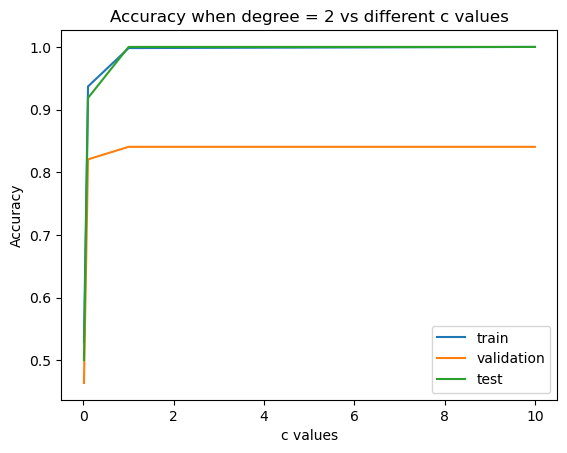

In [11]:
plt.plot(test_accuracy_matrix[:,0],train_accuracy_matrix[:,1])
plt.plot(test_accuracy_matrix[:,0],cross_accuracy_matrix[:,1])
plt.plot(test_accuracy_matrix[:,0],test_accuracy_matrix[:,1])

plt.legend(["train", "validation", "test"])
plt.ylabel("Accuracy")
plt.xlabel("c values")
plt.title("Accuracy when degree = 2 vs different c values")


Text(0.5, 1.0, 'Accuracy when degree = 3 vs different c values')

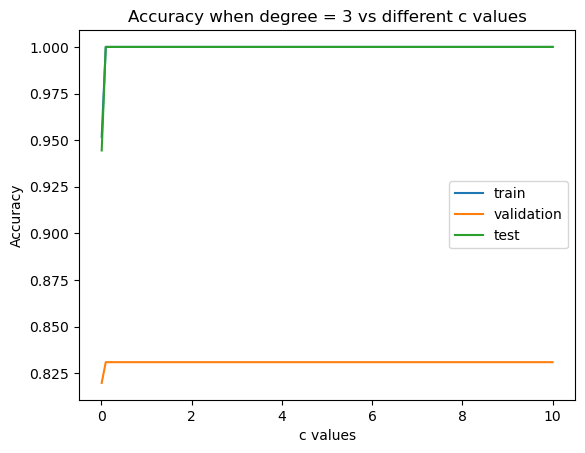

In [12]:
plt.plot(test_accuracy_matrix[:,0],train_accuracy_matrix[:,2])
plt.plot(test_accuracy_matrix[:,0],cross_accuracy_matrix[:,2])
plt.plot(test_accuracy_matrix[:,0],test_accuracy_matrix[:,2])

plt.legend(["train", "validation", "test"])
plt.ylabel("Accuracy")
plt.xlabel("c values")
plt.title("Accuracy when degree = 3 vs different c values")

## Question 3

##### Best values: deg = 3, c = 0.01

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
optimal_svc = SVC(kernel='poly', degree = 3, C = 0.01)
optimal_svc.fit(x,y)

train_acc, train_cm = calculate_accuracy(x_train, y_train, optimal_svc)
print("Train accuracy:", train_acc)
print("Train Confusion Matrix:")
print(train_cm)

print("======================")
print()
test_acc ,test_cm = calculate_accuracy(x_test, y_test, optimal_svc)
print("Test accuracy:", test_acc)
print("Test Confusion Matrix:")
print(test_cm)

Train accuracy: 0.9517625231910947
Train Confusion Matrix:
[[ 59   4   1   0   0   0   0   0]
 [  0 183   0   7   0   0   0   0]
 [  1   2  80   9   0   0   0   1]
 [  0   4   3 424   0   0   0   0]
 [  0   2   0   3  80   1   0   0]
 [  0   1   0   3   0  51   0   0]
 [  0   1   0   0   0   0  45   0]
 [  0   1   1   6   1   0   0 104]]

Test accuracy: 0.9444444444444444
Test Confusion Matrix:
[[ 9  3  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0]
 [ 0  0 26  1  1  0  0  0]
 [ 0  0  0 98  1  0  0  0]
 [ 0  0  0  1 22  0  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  1  1  0 12  0]
 [ 0  1  0  2  1  0  0 27]]
